In [641]:
import numpy as np
import astropy
from astropy.io import fits
from matplotlib import pyplot
import pandas as pd
import plotting as my_plot
import os

import auxil_ML as aux

In [578]:
def h2cum(arr):
    res = 1. * arr[::-1]
    for i in range(1, len(arr)):
        res[i] += res[i - 1]
    return res[::-1]

In [958]:
#folder = '../ML_3FGL_paper_extra/data/python files/catas'
#folder = 'data'
folder = '../ML_3FGL_paper/SOM'
cat = '4FGL'
pop = 'AGN' #'PSR', 'AGN'
quantity = 'Flux1000'
add_os = True
old = False

add_SP = 1
if cat != '3FGL':
    add_SP = False
#p3FGL_fn = '%s/%s_prob_catalog.csv' % (folder, cat)

In [959]:
try_os = False
if try_os:
    #weight_str = 'weighted'
    weight_str = 'oversample'
    fn = '../ML_3FGL_paper_extra/data/python files/catas/%s_unassoc_%s.csv' % (cat, weight_str)
    if 1:
        pcat_os = pd.read_csv(fn, index_col='Source_Name_%s' % cat)
    else:
        pcat_os = pd.read_csv(fn)
    print(pcat_os.columns)

In [960]:
my_plot.setup_figure_pars()
save_plots = 1
plot_assoc_prob = 1
correct_other = 1
test = 0
#add_os = True

alg0 = 'LR' # 'RF', 'BDT', 'LL', 'NN'
algs0 = ['RF', 'BDT', 'LR', 'NN']
if add_os:
    algs_os = [alg + '_O' for alg in algs0] # algorithms with oversampling
else:
    algs_os = []
algs = algs0 + algs_os
SP_algs = ['LR', 'RF']

prop_cycle = pyplot.rcParams['axes.prop_cycle']
cs = prop_cycle.by_key()['color']

#cat = '4FGL' # '3FGL', '4FGL'
if cat == '3FGL':
    fn_cat = '../PS_comparison/gll_psc_v16.fit' # the last release of 3FGL
else:
    #fn_cat = '../PS_comparison/gll_psc_v22.fit' # 4FGL release from 27 May 2020
    fn_cat = '../PS_comparison/gll_psc_v27.fit' # 4FGL_DR2


if cat == '4FGL':
    #cat_name = '4FGL'
    cat_name = '4FGL-DR2'
else:
    cat_name = cat
    
#fn_pcat = '%s/%s_catalog_newfeats.csv' % (folder, cat)
fn_pcat = '%s/%s_prob_catalog.csv' % (folder, cat_name)
#fn_pcat = '%s/%s_prob_catalog_3class.csv' % (folder, cat)

if old:
    fn_pcat = fn_pcat.replace('.csv', '_old.csv')

if add_SP:
    SP_str = '_SazP'
else:
    SP_str = ''

if try_os:
    SP_str += '_%s' % weight_str
    if weight_str == 'weighted':
        alg0 = 'LR'
        algs = ['RF', 'BDT', 'LR']
if add_os:
    SP_str += '_add_os'
    
if old:
    SP_str += '_old'
    
figfn = 'plots/N_logS_%s_%s%s.pdf' % (cat_name, pop, SP_str)
figfn_diff = 'plots/N_logS_diff_%s_%s%s.pdf' % (cat, pop, SP_str)
    
hdu_cat = fits.open(fn_cat)
pcat_fgl = pd.read_csv(fn_pcat, index_col='Source_Name_%s' % cat)

index = np.array(hdu_cat[1].data.field('Source_Name'), dtype=str)
data = {quantity:np.array(hdu_cat[1].data.field(quantity), dtype=float)}
df_fgl = pd.DataFrame(data=data, index=index)
df_fgl.index = [st.strip() for st in df_fgl.index]

# load data from Saz Parkinson
pcat_SP = pd.read_csv('data/FGL3_results.csv', index_col='Source_Name')
pcat_SP.index = ['3FGL %s' %name.strip() for name in pcat_SP.index]

In [961]:
df_fgl_full = aux.hdu2df(hdu_cat[1], index_name='Source_Name')

In [962]:
df_fgl_full.columns

Index(['DataRelease', 'RAJ2000', 'DEJ2000', 'GLON', 'GLAT',
       'Conf_68_SemiMajor', 'Conf_68_SemiMinor', 'Conf_68_PosAng',
       'Conf_95_SemiMajor', 'Conf_95_SemiMinor', 'Conf_95_PosAng', 'ROI_num',
       'Extended_Source_Name', 'Signif_Avg', 'Pivot_Energy', 'Flux1000',
       'Unc_Flux1000', 'Energy_Flux100', 'Unc_Energy_Flux100', 'SpectrumType',
       'PL_Flux_Density', 'Unc_PL_Flux_Density', 'PL_Index', 'Unc_PL_Index',
       'LP_Flux_Density', 'Unc_LP_Flux_Density', 'LP_Index', 'Unc_LP_Index',
       'LP_beta', 'Unc_LP_beta', 'LP_SigCurv', 'PLEC_Flux_Density',
       'Unc_PLEC_Flux_Density', 'PLEC_Index', 'Unc_PLEC_Index',
       'PLEC_Expfactor', 'Unc_PLEC_Expfactor', 'PLEC_Exp_Index',
       'Unc_PLEC_Exp_Index', 'PLEC_SigCurv', 'Npred', 'Variability_Index',
       'Frac_Variability', 'Unc_Frac_Variability', 'Signif_Peak', 'Flux_Peak',
       'Unc_Flux_Peak', 'Time_Peak', 'Peak_Interval', 'TEVCAT_FLAG',
       'ASSOC_TEV', 'CLASS1', 'ASSOC1', 'ASSOC_PROB_BAY', 'ASSOC_PROB

In [963]:
pcat_fgl.columns

Index(['GLON', 'GLAT', 'ln(Energy_Flux100)', 'ln(Unc_Energy_Flux100)',
       'ln(Pivot_Energy)', 'LP_Index', 'Unc_LP_Index', 'LP_beta', 'LP_SigCurv',
       'ln(Variability_Index)', 'HR12', 'HR23', 'HR34', 'HR45', 'HR56', 'HR67',
       'Category_4FGL', 'Class_4FGL', 'ASSOC_FGL', 'ASSOC_FHL', 'ASSOC1',
       'AGN_BDT', 'AGN_BDT_STD', 'PSR_BDT', 'PSR_BDT_STD', 'AGN_NN',
       'AGN_NN_STD', 'PSR_NN', 'PSR_NN_STD', 'AGN_RF', 'AGN_RF_STD', 'PSR_RF',
       'PSR_RF_STD', 'AGN_LR', 'AGN_LR_STD', 'PSR_LR', 'PSR_LR_STD',
       'AGN_BDT_O', 'AGN_BDT_STD_O', 'PSR_BDT_O', 'PSR_BDT_STD_O', 'AGN_NN_O',
       'AGN_NN_STD_O', 'PSR_NN_O', 'PSR_NN_STD_O', 'AGN_RF_O', 'AGN_RF_STD_O',
       'PSR_RF_O', 'PSR_RF_STD_O', 'AGN_LR_O', 'AGN_LR_STD_O', 'PSR_LR_O',
       'PSR_LR_STD_O', 'Flags', 'Category_Prob'],
      dtype='object')

In [964]:
classes = np.array([cl.strip() for cl in df_fgl_full['CLASS1']], dtype=str)
print(sum(classes == 'PSR') + sum(classes == 'psr'))
print(sum(pcat_fgl['Category_%s' %cat] == 'PSR'))

271
271


In [965]:
# flux or another value for associated and unassociated sources
if quantity == 'index':
    if cat == '3FGL':
        value_fgl = hdu_cat[1].data.field('Spectral_Index')
    else:
        value_fgl = hdu_cat[1].data.field('PL_Index')
elif quantity == 'Flux1000':
    df_fgl['value'] = np.log10(np.array(df_fgl[quantity]))


In [966]:
class_mask_fgl = (pcat_fgl['Category_%s' %cat] == pop)
unassoc_mask_fgl = (pcat_fgl['Category_%s' %cat] == 'UNAS')
all_assoc_mask_fgl = (pcat_fgl['Category_%s' %cat] != 'UNAS')
other_mask_fgl = (pcat_fgl['Category_%s' %cat] == 'OTHER')

#source_names_fgl = [name for name in pcat_fgl.index if class_mask_fgl_assoc[name]]
class_fgl_sources = [name for name in pcat_fgl.index if class_mask_fgl[name]]
all_assoc_fgl_sources = [name for name in pcat_fgl.index if all_assoc_mask_fgl[name]]
unassoc_fgl_sources = [name for name in pcat_fgl.index if unassoc_mask_fgl[name]]
other_fgl_sources = [name for name in pcat_fgl.index if other_mask_fgl[name]]

#minv = np.min(df_fgl.loc[class_fgl_sources, 'value'])
#maxv = np.max(df_fgl.loc[class_fgl_sources, 'value'])
if pop == 'AGN':
    bins = np.linspace(-10.5, -7, 19)
elif pop == 'PSR':
    bins = np.linspace(-10, -6.5, 19)
binsc = (bins[1:] + bins[:-1])/2
print(bins.shape)
print(np.sum(unassoc_mask_fgl))

(19,)
1658


In [967]:
print(sum(class_mask_fgl))

3499


In [968]:

# correction for other sources
other_values_fgl = df_fgl.loc[other_fgl_sources, 'value']

hist_all_assoc_fgl = np.histogram(df_fgl.loc[all_assoc_fgl_sources, 'value'], bins=bins)
hist_all_unassoc_fgl = np.histogram(df_fgl.loc[unassoc_fgl_sources, 'value'], bins=bins)
hist_class_fgl = np.histogram(df_fgl.loc[class_fgl_sources, 'value'], bins=bins)

other_fgl_corr = {}
other_fgl_class_corr = {}
for alg in algs:
    label = '%s_%s' % (pop, alg)
    probs = pcat_fgl.loc[other_fgl_sources, label]
    hist_other_fgl = np.histogram(other_values_fgl, bins=bins, weights=probs)
    if correct_other:
        other_fgl_corr[alg] = hist_other_fgl[0]/(hist_all_assoc_fgl[0] + 0.00001) * \
                    hist_all_unassoc_fgl[0]
        other_fgl_class_corr[alg] = hist_other_fgl[0]
    else:
        other_fgl_corr[alg] = np.zeros_like(hist_other_fgl[0])
        other_fgl_class_corr[alg] = np.zeros_like(hist_other_fgl[0])
        
if add_SP:
    other_SP_corr = {}
    other_SP_class_corr = {}
    for alg in SP_algs:
        label = '%s_P' % (alg)
        probs = pcat_SP.loc[other_fgl_sources, label]
        hist_other_SP = np.histogram(other_values_fgl, bins=bins, weights=probs)
        if correct_other:
            other_SP_corr[alg] = hist_other_SP[0]/(hist_all_assoc_fgl[0] + 0.00001) * \
                        hist_all_unassoc_fgl[0]
            other_SP_class_corr[alg] = hist_other_SP[0]
        else:
            other_SP_corr[alg] = np.zeros_like(hist_other_fgl[0])
            other_SP_class_corr[alg] = np.zeros_like(hist_other_fgl[0])



In [969]:
def sub_dict(dct, keys):
    return {key:dct[key] for key in keys}

In [970]:
# probabilities and masks (for associated sources)
unassoc_values_fgl = df_fgl.loc[unassoc_fgl_sources, 'value']
class_values_fgl = df_fgl.loc[class_fgl_sources, 'value']
all_assoc_values_fgl = df_fgl.loc[all_assoc_fgl_sources, 'value']

hpcat_fgl = {}
hpcat_fgl_class = {}
prob_fgl_unassoc = {}
prob_fgl_class = {}

if try_os:
    prob_fgl_unassoc_os = {}
    hpcat_fgl_os = {}
    
for alg in algs:
    label = '%s_%s' % (pop, alg)
    prob_fgl_unassoc[alg] = np.array(pcat_fgl.loc[unassoc_fgl_sources, label]) # prob
    prob_fgl_class[alg] = np.array(pcat_fgl.loc[all_assoc_fgl_sources, label]) # prob
    hpcat_fgl[alg] = np.histogram(unassoc_values_fgl, bins=bins, 
                                   weights=prob_fgl_unassoc[alg])[0]
    hpcat_fgl_class[alg] = np.histogram(all_assoc_values_fgl, bins=bins, 
                                   weights=prob_fgl_class[alg])[0]
    
    if try_os:
        prob_fgl_unassoc_os[alg] = np.array(pcat_os.loc[unassoc_fgl_sources, label]) # prob
        hpcat_fgl_os[alg] = np.histogram(unassoc_values_fgl, bins=bins, 
                                       weights=prob_fgl_unassoc_os[alg])[0]

    


In [971]:
if add_SP:
    prob_SP_unassoc = {}
    prob_SP_class = {}
    hpcat_SP = {}
    hpcat_SP_class = {}
    for alg in SP_algs:
        label = '%s_P' % alg
        prob_SP_unassoc[alg] = np.array(pcat_SP.loc[unassoc_fgl_sources, label]) # prob
        prob_SP_class[alg] = np.array(pcat_SP.loc[all_assoc_fgl_sources, label]) # prob
        if pop != 'PSR':
            prob_SP_unassoc[alg] = 1 - prob_SP_unassoc[alg]
            prob_SP_class[alg] = 1 - prob_SP_class[alg]

        hpcat_SP[alg] = np.histogram(unassoc_values_fgl, bins=bins, 
                                    weights=prob_SP_unassoc[alg])[0]
        hpcat_SP_class[alg] = np.histogram(all_assoc_values_fgl, bins=bins, 
                                   weights=prob_SP_class[alg])[0]



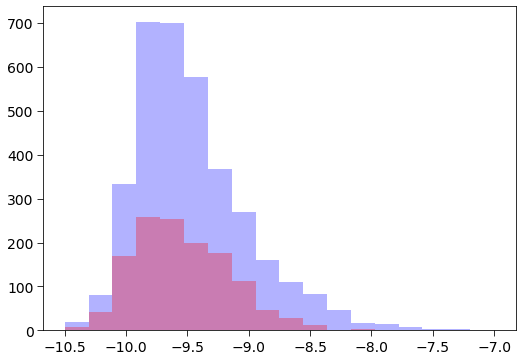

In [972]:
if 1:
    pyplot.figure()
    h3 = pyplot.hist(df_fgl.loc[class_fgl_sources, 'value'], 
                         bins=bins, color='b', alpha=0.3)
    hpcat_fgl0 = pyplot.hist(unassoc_values_fgl, bins=bins, color='r', 
                                alpha=0.3, weights=prob_fgl_unassoc[alg0])

In [973]:
def min_max_vs(dct, corr={}):
    vals = np.array([dct[key] - corr.get(key, 0.) for key in dct.keys()])
    return np.min(vals, axis=0), np.max(vals, axis=0)

In [974]:
hpcat_fgl0[0]/(h3[0] + 0.0000001)

array([0.36767856, 0.51482738, 0.50473158, 0.36759497, 0.36382593,
       0.34273605, 0.47667243, 0.41991414, 0.28337904, 0.26188089,
       0.14883067, 0.0317102 , 0.14140754, 0.0340174 , 0.02388128,
       0.27472568, 0.        , 0.        ])

Number of AGN among unassociated source in 4FGL: 1068.776 +- 200.484
Number of associated AGN: 3496.000
[ 19.  81. 334. 703. 700. 577. 368. 270. 160. 110.  82.  47.  16.  14.
   8.   4.   2.   1.]
Associated
[1.85653979e+01 7.89793393e+01 3.21916125e+02 6.72119672e+02
 6.60031594e+02 5.39105422e+02 3.39350393e+02 2.53867036e+02
 1.53230315e+02 1.01846933e+02 7.43078665e+01 4.51028996e+01
 1.36155851e+01 1.19484235e+01 7.24055259e+00 3.28507402e+00
 8.94445856e-01 5.15713339e-08] [ 18.94883274  80.83580858 333.12435895 700.64783363 696.25883231
 569.69342807 358.35487954 261.69684449 158.34848617 108.39139646
  79.48024328  48.27635132  16.12025062  14.10331636   8.41626083
   3.90205106   2.03429411   0.94167208]
Unassociated
[ 6.53836555e+00  4.00828044e+01  1.59490272e+02  2.30539174e+02
  1.94019866e+02  1.18163263e+02  6.81159352e+01  3.28775527e+01
  1.16153804e+01  3.95395417e+00  1.43812555e+00 -4.44191736e-01
  9.57838968e-01  2.23901711e-02 -2.75396028e-02  9.49516398e-01
  0.

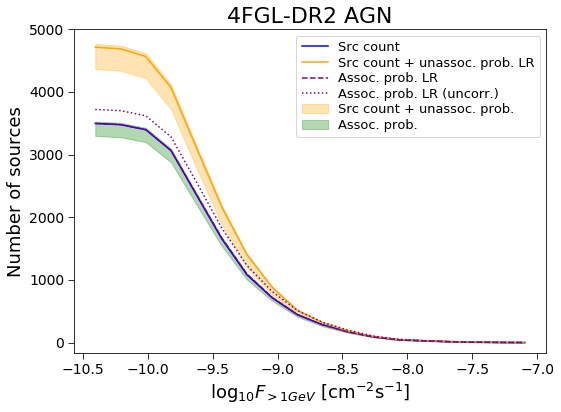

In [975]:
#plot = pyplot.semilogy 
plot = pyplot.plot
    
xs = binsc
pyplot.figure()
plot(xs, h2cum(h3[0]), c='blue', ls='-', label='Src count')
pcat_hist_fgl = hpcat_fgl[alg0] - other_fgl_corr[alg0]
pcat_hist_fgl_class = hpcat_fgl_class[alg0] - other_fgl_class_corr[alg0]


plot(xs, h2cum(h3[0] + pcat_hist_fgl), c='orange', ls='-', label='Src count + unassoc. prob. %s' % alg0)

minvs, maxvs = min_max_vs(sub_dict(hpcat_fgl, algs), corr=sub_dict(other_fgl_corr, algs))
pyplot.fill_between(xs, h2cum(h3[0] + minvs), h2cum(h3[0] + maxvs), color='orange', alpha=0.3,
                    label='Src count + unassoc. prob.')

mean = h2cum(maxvs + minvs) / 2.
delta = h2cum(maxvs - minvs) / 2.
print('Number of %s among unassociated source in %s: %.3f +- %.3f' % (pop, cat, mean[0], delta[0]))
print('Number of associated %s: %.3f' % (pop, h2cum(h3[0])[0]))
print(h3[0])

if try_os:
    pcat_hist_fgl_os = hpcat_fgl_os[alg0] - other_fgl_corr[alg0]
    plot(xs, h2cum(h3[0] + pcat_hist_fgl_os), c=cs[5], ls=':', label='Src count + unassoc. prob. oversample')

    
if plot_assoc_prob:
    plot(xs, h2cum(pcat_hist_fgl_class), c='purple', ls='--', label='Assoc. prob. %s' % alg0)
    plot(xs, h2cum(hpcat_fgl_class[alg0]), c='purple', ls=':', label='Assoc. prob. %s (uncorr.)' % alg0)
    minvs, maxvs = min_max_vs(sub_dict(hpcat_fgl_class, algs), corr=sub_dict(other_fgl_class_corr, algs))
    pyplot.fill_between(xs, h2cum(minvs), h2cum(maxvs), color='green', alpha=0.3, label='Assoc. prob.')
    if add_os:
        minvs, maxvs = min_max_vs(sub_dict(hpcat_fgl_class, algs_os), corr=sub_dict(other_fgl_class_corr, algs_os))
        #pyplot.fill_between(xs, h2cum(minvs), h2cum(maxvs), color=cs[5], alpha=0.5)
        print('Associated')
        print(minvs, maxvs)
        
if add_os:
    minvs, maxvs = min_max_vs(sub_dict(hpcat_fgl, algs_os), corr=sub_dict(other_fgl_corr, algs_os))
    print('Unassociated')
    print(minvs, maxvs)
    #pyplot.fill_between(xs, h2cum(h3[0] + minvs), h2cum(h3[0] + maxvs), color=cs[6], alpha=0.5)

        
    

if try_os:
    minvs, maxvs = min_max_vs(hpcat_fgl_os, corr=other_fgl_corr)
    pyplot.fill_between(xs, h2cum(h3[0] + minvs), h2cum(h3[0] + maxvs), color=cs[5], alpha=0.5)
    
    mean = h2cum(maxvs + minvs) / 2.
    delta = h2cum(maxvs - minvs) / 2.
    print('Number of %s (os): %.1f +- %.1f' % (pop, mean[0], delta[0]))


if add_SP:
    pcat_hist_SP = hpcat_SP[alg0] - other_SP_corr[alg0]
    pcat_hist_SP_class = hpcat_SP_class[alg0] - other_SP_class_corr[alg0]

    plot(xs, h2cum(h3[0] + pcat_hist_SP), c='gray', ls='--', label='Src count + unassoc. prob. LR (SP16)')
    plot(xs, h2cum(pcat_hist_SP_class), c='black', ls='-.', label='Assoc. prob. LR (SP16)')
    plot(xs, h2cum(hpcat_SP_class[alg0]), c='black', ls=':', label='Assoc. prob. LR (SP16, uncorr.)')
    
    minvs, maxvs = min_max_vs(hpcat_SP_class, corr=other_SP_class_corr)
    pyplot.fill_between(xs, h2cum(minvs), h2cum(maxvs), color='gray', alpha=0.5, label='Assoc. prob. (SP16)')
    #print('SP check')
    #print(h2cum(pcat_hist_SP_class), h2cum(minvs), h2cum(maxvs))
    #print(hpcat_SP_class)
    #print(other_SP_class_corr)


pyplot.xlabel(r'$\log_{10} F_{>1 GeV}\ [\rm cm^{-2}s^{-1}]$')
pyplot.ylabel('Number of sources')
pyplot.legend(fontsize=13, labelspacing=0.2)
if pop == 'AGN':
    if cat == '3FGL':
        pyplot.ylim(-100, 3000)
    else:
        pyplot.ylim(-170, 5000)
else:
    if cat == '3FGL':
        pyplot.ylim(-20, 600)
    else:
        pyplot.ylim(-1050/30, 1050)

title = '%s %s' % (cat_name, pop)
if old:
    title += ' (old)'
#if plot_assoc_prob:
#    title += ' (%s)' % weight_str
pyplot.title(title)
if save_plots:
    print('Save figure to file:', figfn)
    pyplot.savefig(figfn)
    if not test:
        command = 'cp %s ../ML_3FGL_paper/plots' % figfn
        print(command)
        os.system(command)

In [976]:
hpcat_fgl.keys()

dict_keys(['RF', 'BDT', 'LR', 'NN', 'RF_O', 'BDT_O', 'LR_O', 'NN_O'])

In [977]:
print(hpcat_fgl_class['RF'])
#print(hpcat_fgl_class['RF_O'])

[ 18.48373389  81.0259955  337.08307426 716.3645029  732.70277681
 603.19860315 418.17156027 301.10336426 186.88928155 127.59221057
  97.54697157  55.86264922  26.65421022  17.21274512  11.97064366
   4.93803614   3.44367299   1.12766721]


In [978]:
# checks
print('All unassociated surces')
print(hist_all_unassoc_fgl[0])
print('All associated surces')
print(hist_all_assoc_fgl[0])
print('Associated surces of %s class' % pop)
print(hist_class_fgl[0])
print(h3[0])
print('Other associated surces')
print(hist_other_fgl[0])
print('Estimated number of %s sources from probabilities' % pop)
print(pcat_hist_fgl_class)
print('Estimated number of %s sources among unassociated ones' % pop)
print(hpcat_fgl[alg0])
if try_os:
    print('Estimated number of %s sources among unassociated ones (%s)' % (pop, weight_str))
    print(hpcat_fgl_os[alg0])
    

All unassociated surces
[  7  42 170 268 274 238 238 178  90  69  52  16   9   2   1   2   0   0]
All associated surces
[ 19  82 341 725 745 621 445 338 231 180 149  85  61  33  26  12   9   4]
Associated surces of AGN class
[ 19  81 334 703 700 577 368 270 160 110  82  47  16  14   8   4   2   1]
[ 19.  81. 334. 703. 700. 577. 368. 270. 160. 110.  82.  47.  16.  14.
   8.   4.   2.   1.]
Other associated surces
[0.00000000e+00 9.90112934e-01 6.80684161e+00 1.77679660e+01
 2.88665568e+01 1.86690764e+01 2.65546162e+01 1.59213196e+01
 8.67690991e+00 6.35226159e+00 5.82482662e+00 3.01340810e+00
 3.88015946e+00 2.42851612e+00 1.03879976e+00 7.82468134e-03
 1.98968400e-02 2.02083191e-03]
Estimated number of AGN sources from probabilities
[1.89147356e+01 8.06129133e+01 3.31433684e+02 6.97678117e+02
 6.95291888e+02 5.77197344e+02 3.73997466e+02 2.75029562e+02
 1.64707583e+02 1.11941846e+02 8.00147810e+01 4.74918327e+01
 1.47873712e+01 1.33820890e+01 7.94547260e+00 3.97851859e+00
 1.66096358e+

In [979]:
print(other_fgl_corr[alg0] / (h3[0] + hpcat_fgl[alg0] + 0.0001))

[0.         0.00415914 0.0068968  0.00751752 0.01346343 0.01200768
 0.04097245 0.03997447 0.04500252 0.03400779 0.05021867 0.01962096
 0.05777506 0.01065789 0.00629059 0.00055308 0.         0.        ]


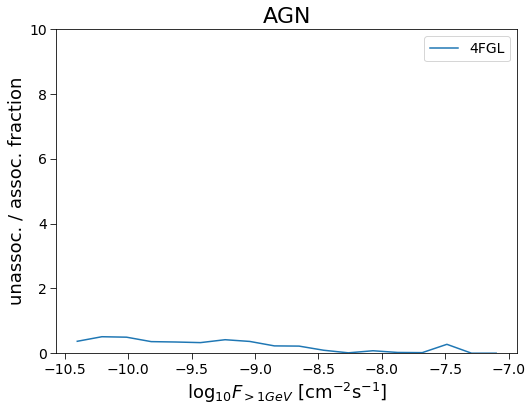

In [980]:
eps = 1.e-10
pyplot.rcParams['figure.subplot.left'] = 0.18
pyplot.rcParams['figure.subplot.right'] = 0.98

pyplot.figure()
pyplot.plot(binsc, pcat_hist_fgl / (h3[0] + eps), c=cs[0], ls='-', label=cat)
#pyplot.plot(binsc, hpcat_fgl0[0], c=cs[2], ls='--', label='fgl unassoc. prob.')
#pyplot.plot(binsc, np.sign(h4[0]) * pcat_hist_4fgl / (h4[0] + eps), c=cs[1], ls='-.', label='4FGL')
#pyplot.plot(binsc, hpcat_4fgl0[0], c=cs[3], ls=':', label='4FGL unassoc. prob.')

pyplot.legend()

pyplot.xlabel(r'$\log_{10} F_{>1 GeV}\ [\rm cm^{-2}s^{-1}]$')
pyplot.ylabel('unassoc. / assoc. fraction')
pyplot.ylim(0, 10)
pyplot.legend()
title = pop
#if plot_assoc_prob:
#    title += ' (%s)' % weight_str
pyplot.title(title)

if save_plots and 0:
    print('Save figure to file:', figfn_diff)
    pyplot.savefig(figfn_diff)

In [981]:
if 0:
    col_names3 = [hdu3[1].header[key] for key in hdu3[1].header.keys() if key.startswith('TTYPE')]
    col_names4 = [hdu4[1].header[key] for key in hdu4[1].header.keys() if key.startswith('TTYPE')]
    #print(col_names3)
    #print(col_names4)
    
    labels = {}
    labels['AGN'] = ["agn", "bcu", "bll", "css", "fsrq", "nlsy1", "rdg", "sey", "ssrq"]
    labels['PSR'] = ["PSR", "psr",]
    labels['other'] = ["bin", "hmb", "nov", "PSR", "psr", "pwn",  "snr", "spp", "glc", "sfr"]
    psclass4 = list(hdu4[1].data.field('CLASS1'))


In [982]:
if 0:
    psclass3 = list(hdu3[1].data.field('CLASS1'))
    psclass4 = list(hdu4[1].data.field('CLASS1'))

    n3 = len(psclass3)
    n4 = len(psclass4)

    inds3 = [i for i in range(n3) if psclass3[i] in pop_key]
    inds4 = [i for i in range(n4) if psclass4[i] in pop_key]

    
    print(len(value_pcat_fgl))
    print(len(prob), sum(prob))

In [983]:
N = len(pcat_SP['CLASS1'])
unass_SP = np.array([type(pcat_SP['CLASS1'][i]) != str for i in range(N)])

In [984]:
def nPSR(thres, pcat=pcat_SP, unass=unass_SP, methods=['LR_P', 'RF_P']):
    res = unass.copy()
    for method in methods:
        res = res & (pcat[method] > thres)
    return np.sum(res)


In [985]:
thress = np.arange(0.05, 1., 0.05)
nPSRs_SP = {}
nPSRs_SP['Joint SP'] = np.array([nPSR(thres) for thres in thress])
methods_SP = ['LR_P', 'RF_P']
for method in methods_SP:
    nPSRs_SP[method] = np.array([nPSR(thres, methods=[method]) for thres in thress])

In [986]:
pop_loc = 'PSR'
#fgl_methods = ['PSR_NN', 'PSR_LR', 'PSR_RF', 'PSR_BDT']
fgl_methods = ['%s_%s' % (pop_loc, alg) for alg in algs]
def nPSR_fgl(thres, methods=fgl_methods):
    return nPSR(thres, pcat=pcat_fgl, unass=unass_fgl, methods=methods)

In [987]:

unass_fgl = pcat_fgl['Category_%s' % cat] == 'UNAS'
print(np.sum((pcat_fgl['Category_Prob'] == 'PSR') & unass_fgl))
print(nPSR_fgl(0.5))

162
162


In [988]:
nPSR(0.5)

182

In [989]:
nPSRs_fgl = {}
nPSRs_fgl['Joint FGL'] = np.array([nPSR_fgl(thres) for thres in thress])
for method in fgl_methods:
    nPSRs_fgl[method] = np.array([nPSR_fgl(thres, methods=[method]) for thres in thress])


(0, 1)

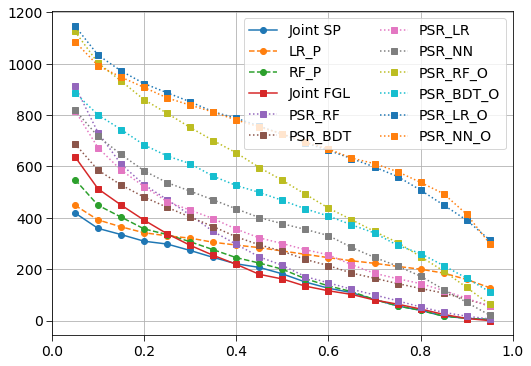

In [990]:
for key, nPSRs in nPSRs_SP.items():
    ls = '--'
    if key.startswith('Joint'):
        ls = '-'
    pyplot.plot(thress, nPSRs, ls=ls, marker='o', label=key)

for key, nPSRs in nPSRs_fgl.items():
    ls = ':'
    if key.startswith('Joint'):
        ls = '-'
    pyplot.plot(thress, nPSRs, ls=ls, marker='s', label=key)
    
pyplot.legend(ncol=2)
pyplot.grid()
pyplot.xlim(0, 1)